<a href="https://colab.research.google.com/github/Thiraput01/Dig_img/blob/main/3_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week #1 Intro
## Exercise #1: read and show an image, get pixel values
* skimage.io
* cv2

* Download "kitty.jpg" image

In [ ]:
!wget https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe -O kitty.jpg

--2024-08-07 08:03:11--  https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.google.com (drive.google.com)... 172.217.164.14, 2607:f8b0:4025:802::200e
Connecting to drive.google.com (drive.google.com)|172.217.164.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe [following]
--2024-08-07 08:03:11--  https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.0.65, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79570 (78K) [image/jpeg]
Saving to: ‘kitty.jpg’

kitty.jpg           100%[===================>]  77.71K  --.-KB/s    in 0.02s   

2024-08-07 08:03:13 (3.78 MB/s) - ‘kitty.jpg’ saved [79570/79570]


* Read and show image using skimage.io

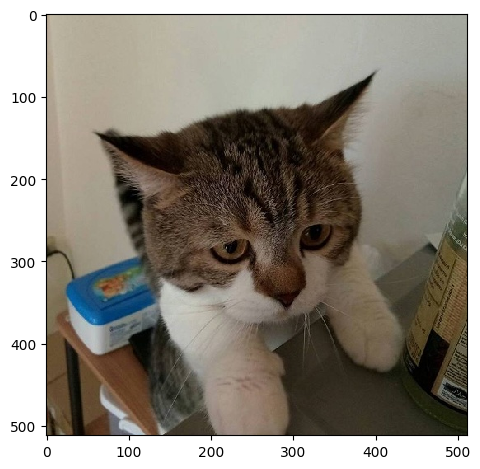

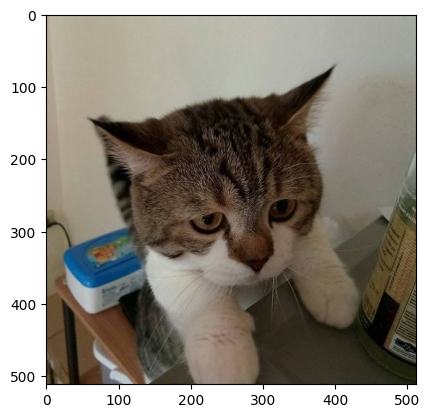

In [ ]:
from skimage import io, color
img = io.imread("kitty.jpg")
io.imshow(img)
io.show()

import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()


* Display some part of the image

In [ ]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(512, 512, 3)


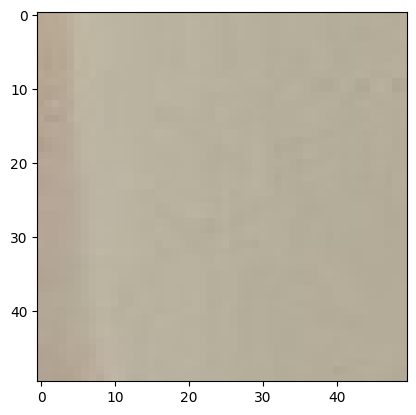

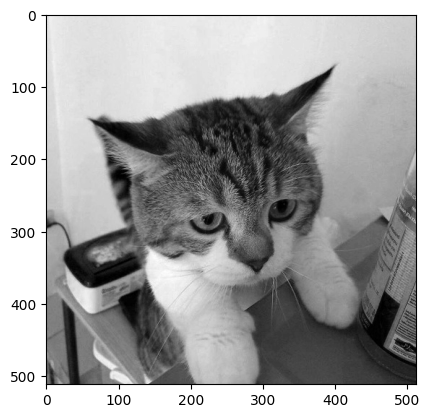

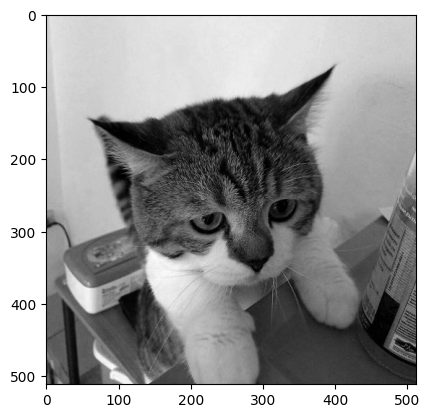

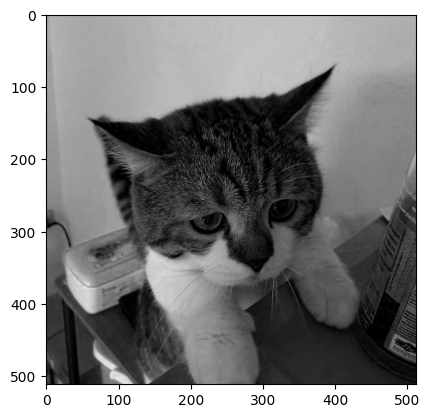

In [ ]:
# TO DO: show some part of the image

plt.imshow(img[0:50,0:50,:])
plt.show()
plt.imshow(img[:,:,0],cmap= 'gray')
plt.show()

plt.imshow(img[:,:,1],cmap= 'gray')
plt.show()

plt.imshow(img[:,:,2],cmap= 'gray')
plt.show()

In [ ]:
img[100,100]

array([178, 171, 153], dtype=uint8)

* Read and display using cv2

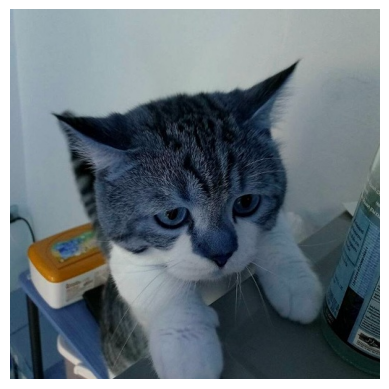

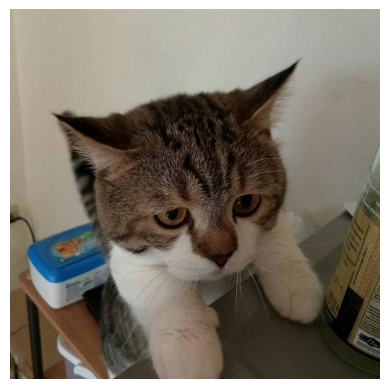

In [ ]:
import cv2
image2 = cv2.imread("kitty.jpg")


plt.imshow(image2)
plt.axis('off')
plt.show()

# TO DO: show the image properly
img3 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.axis('off')
plt.show()




In [ ]:
print(img3.dtype)

uint8


## Exercise #2 Dicom file
DICOM® — Digital Imaging and Communications in Medicine — is the international standard for medical images and related information. It defines the formats for medical images that can be exchanged with the data and quality necessary for clinical use.

Ref. https://www.dicomstandard.org

* What is the image size?
* What is the datatype of pixel_array ?
* Min/max?
* Try with “MR_small.dcm”



In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.1 MB/s eta 0:00:00


Patient's Name...: CompressedSamples^CT1
Patient ID.......: 1CT1
Modality.........: CT
Study Date.......: 20040119
Image size.......: 128 x 128
Pixel Spacing....: [0.661468, 0.661468]


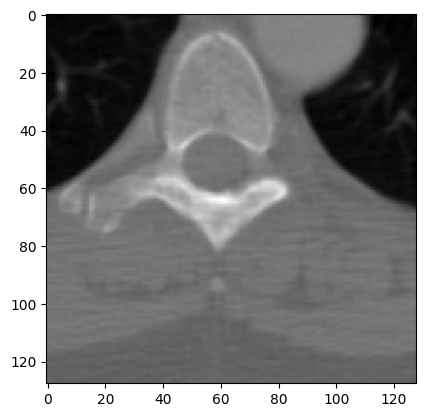

In [ ]:
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file


fpath = get_testdata_file('CT_small.dcm')
ds = dcmread(fpath)

print(f"Patient's Name...: {ds.PatientName}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")

# plot the image using matplotlib
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()


In [ ]:
# data type?
print(ds.pixel_array.dtype)
print(ds.pixel_array.min())
print(ds.pixel_array.max())


int16
128
2191


## Exercise #3 Image Color Visualization
* 0 is always black?
* 255 is  always white?

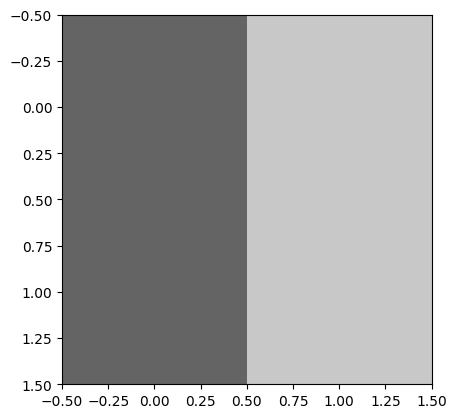

In [ ]:
import numpy as np
a = np.array([[100,200],[100,200]])
# TO DO: show image a
plt.imshow(a, cmap='gray',vmin=0,vmax=255)
plt.show()



b = np.array([[0.5,0.7],[0.9,1.0]])
# TO DO: show image b

## Exercises # 4
Create  an image of 100x100 which has red color on the half left and cyan color on the half right and display the image


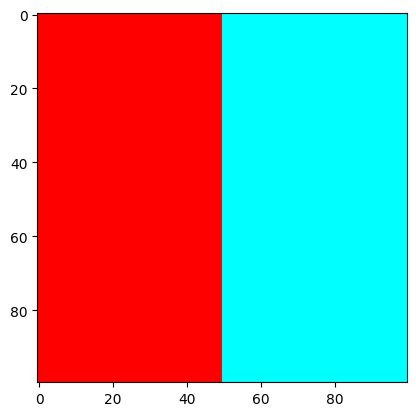

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.zeros((100,100,3),dtype=int)

a[:,:50,:] = (255,0,0)
a[:,:50,:] = (0,255,255)

plt.imshow(a)
plt.show()



# Week #2 Image Formation, Colors, Point Operations

In [ ]:
!wget https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe -O kitty.jpg
!wget https://drive.google.com/uc?id=18oft21cCMRsIYwJ0-abLc3mrWAonHGSW -O rgb.png

--2024-08-14 08:38:05--  https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.google.com (drive.google.com)... 74.125.26.100, 74.125.26.138, 74.125.26.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.26.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe [following]
--2024-08-14 08:38:05--  https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.215.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79570 (78K) [image/jpeg]
Saving to: ‘kitty.jpg’

kitty.jpg           100%[===================>]  77.71K  --.-KB/s    in 0.001s  

2024-08-14 08:38:07 (64.8 MB/s) - ‘kitty.jpg’ saved [79

## Exercise #1 Quantization
* 2 bits

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np


img = io.imread("kitty.jpg")
gray = color.rgb2gray(img) # -> 8-bit 0-255
# TO DO: Quantize the grayscale image to have 2 bits or 4 colors




plt.imshow(img)
plt.axis('off')
plt.show()

* Quantize an image to be represented by 1 bit

## Exercise #2 Shrink and Zoom
* Shrink an image to 64 x 64
* Zoom in an image to 1000 x 1000

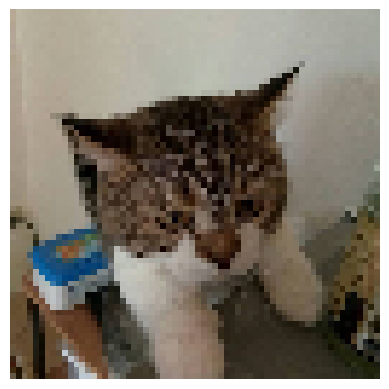

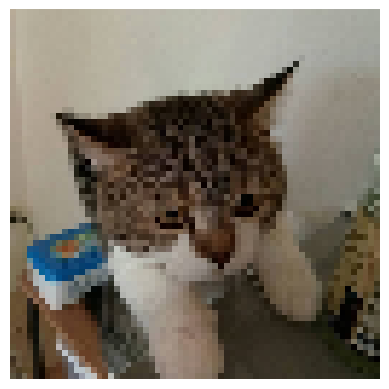

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np

# Shrink
SIZE = 64

img = cv2.imread("kitty.jpg")
img_resize_nn = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_NEAREST) # nearest
img_resize_bc = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_CUBIC) # bicubic

# TO DO : Try with AREA & LINEAR INTERPOLATION TECHNIQUES
img_resize_ar = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_AREA) # nearest
img_resize_li = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_LINEAR) # bicubic

# Write your code to visualize the results
plt.imshow(img_resize_nn[:,:,::-1])
plt.axis('off')
plt.show()

plt.imshow(img_resize_bc[:,:,::-1])
plt.axis('off')
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np

# Zoom in
SIZE = 1000





## Exercise #3 Arithmetic Operations
* Gain
* Bias


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

GAIN = 2

img = cv2.imread("kitty.jpg")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_div = cv2.divide(img_gray,GAIN)
img_mul = cv2.multiply(img_gray,GAIN)

# Write your code to visualize the results









In [ ]:
# TO DO : use the bias of 50 and -50

In [ ]:
# Playing with RGB image


# working with RGB
GAIN = (2,2,2,1)
img = cv2.imread("kitty.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_div = cv2.divide(img_rgb,GAIN)
img_mul = cv2.multiply(img_rgb,GAIN)

# Write your code to visualize the results








## Exercise #4 Color Models

Select one of the following color models, visualize each component in the model and analyze the results
-------
* HSV
* YCbCr
* CIELAB

In [ ]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("rgb.png")
plt.imshow(img[:,:,::-1])
plt.show()

img_gray = cv2.cvtColor(img,cv2.COLOR__________)





# Week #3 Histogram and Spatial Filtering


In [ ]:
!wget https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe -O kitty.jpg
!wget https://drive.google.com/uc?id=1Z5tdeugKi8LyB2g-jJTwu3Y89Ljqj_SF -O area.jpg
!wget https://drive.google.com/uc?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG -O camaraman.tif
!wget https://drive.google.com/uc?id=1J_SEj79YhWVcQrQKVEQkBDHroB-LxZgQ -O moon.png
!wget https://drive.google.com/uc?id=1eCyTF6u_w6bIDWrPONXJO5K0mo16DWwV -O sudoku.jpg

--2024-08-21 06:25:14--  https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.google.com (drive.google.com)... 173.194.174.102, 173.194.174.138, 173.194.174.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.174.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe [following]
--2024-08-21 06:25:14--  https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79570 (78K) [image/jpeg]
Saving to: ‘kitty.jpg’

kitty.jpg           100%[===================>]  77.71K  --.-KB/s    in 0.001s  

2024-08-21 06:25:16 (104 MB/s) - ‘kitty.jpg’ save

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Exercise #1 Histogram
* grayscale
* rgb
* equalization
* CLAHE

* Grayscale Histogram

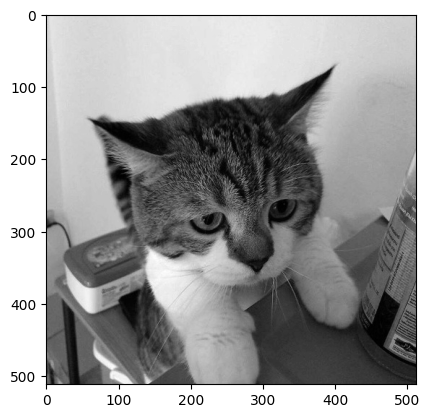

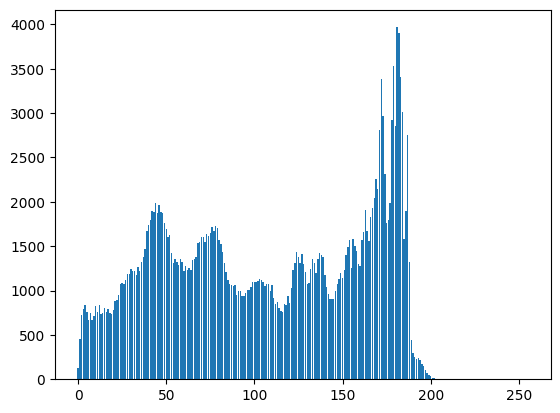

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("kitty.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
plt.imshow(img_gray,cmap='gray');plt.show()
plt.bar(range(0,256),hist[:,0])
plt.show()

* RGB Histogram

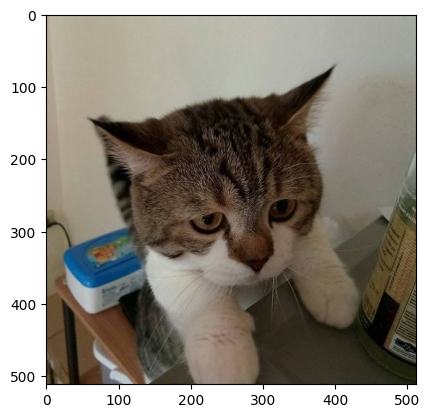

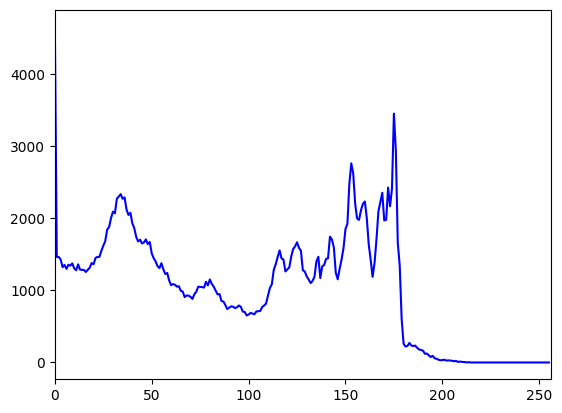

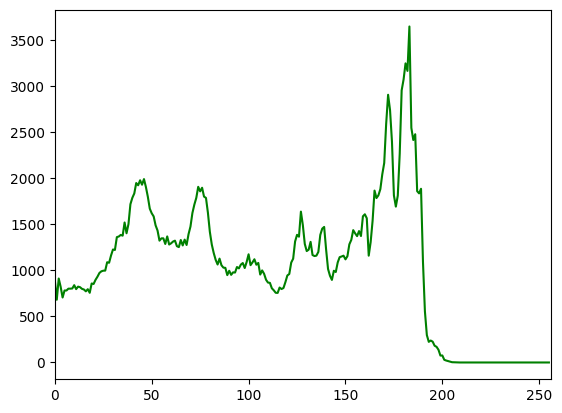

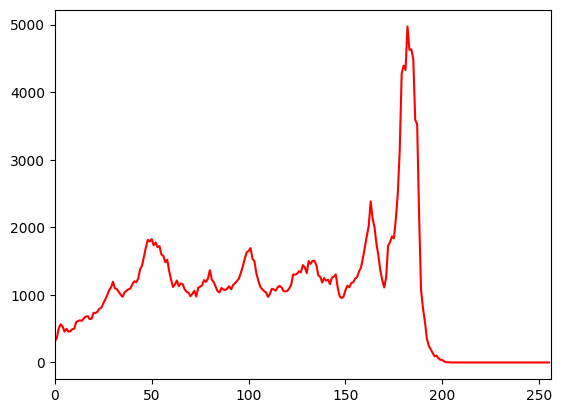

In [ ]:
plt.imshow(img[:,:,::-1]);plt.show()
chans = cv2.split(img)
colors = ("b", "g", "r")
for (chan, color) in zip(chans, colors):
  # create a histogram for the current channel and plot it
  hist = cv2.calcHist( [chan], [0], None, [256], [0,256] )
  plt.plot(hist, color=color)
  plt.xlim([0, 256])
  plt.show()







* Histogram Equalization

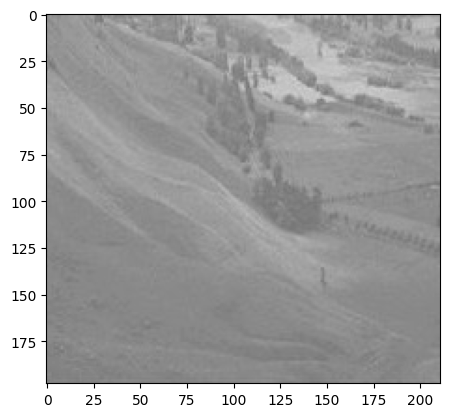

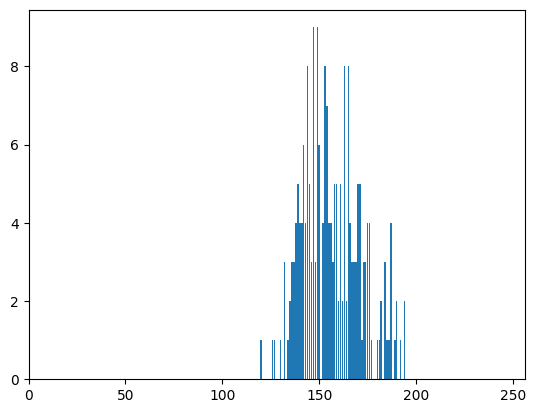

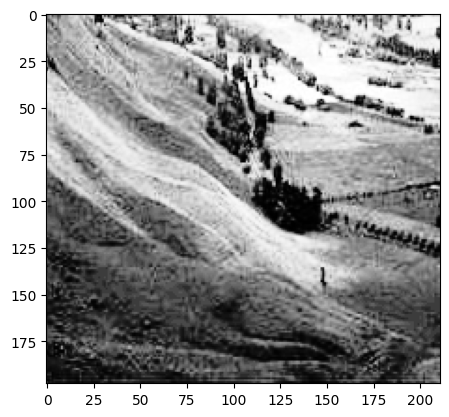

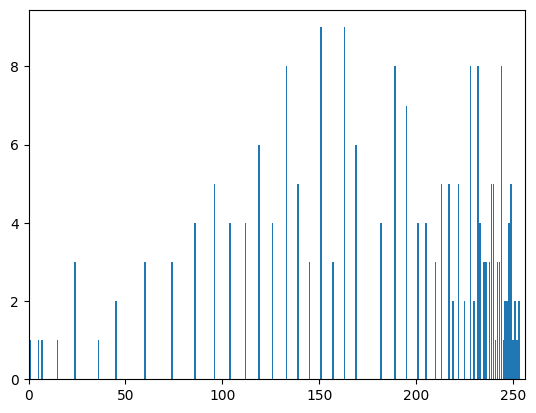

In [ ]:
import cv2
img = cv2.imread("area.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# plot histogram of equalization + plot the histogram before and after equalized
# img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist(img_gray, [0], None, [256], [0, 256])
plt.imshow(img_gray,cmap='gray',vmin=0,vmax=255);plt.show()
plt.bar(range(0,256),hist[:,0])
plt.xlim([0, 256])
plt.show()

equ = cv2.equalizeHist(img_gray)
plt.imshow(equ,cmap='gray')
plt.show()

histeq = cv2.calcHist(equ, [0], None, [256], [0, 256])
plt.bar(range(0,256),histeq[:,0])
plt.xlim([0, 256])
plt.show()







* CLAHE

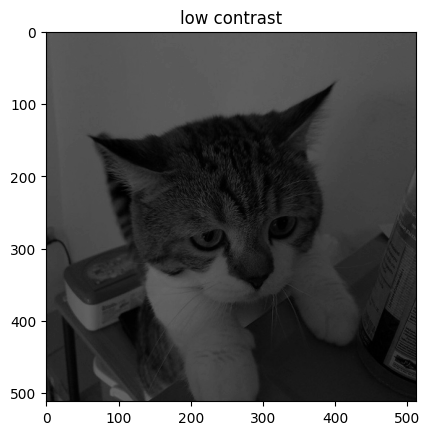

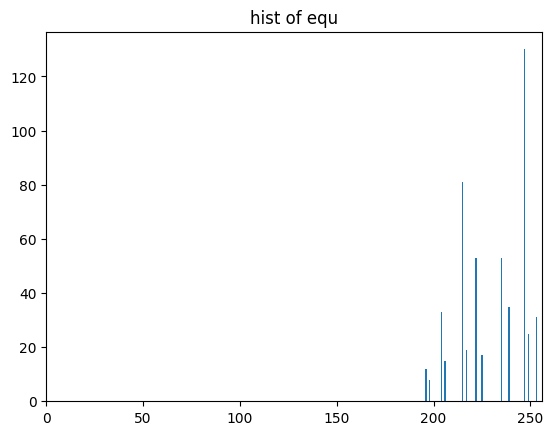

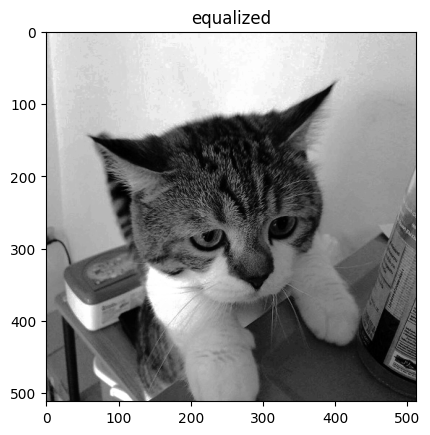

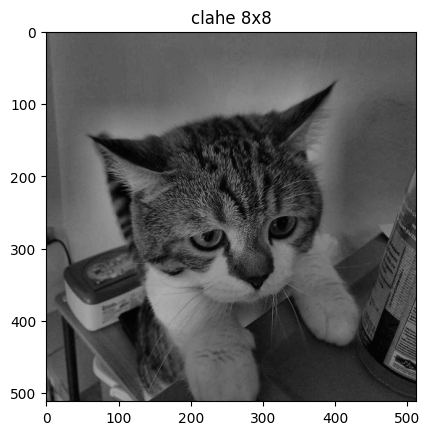

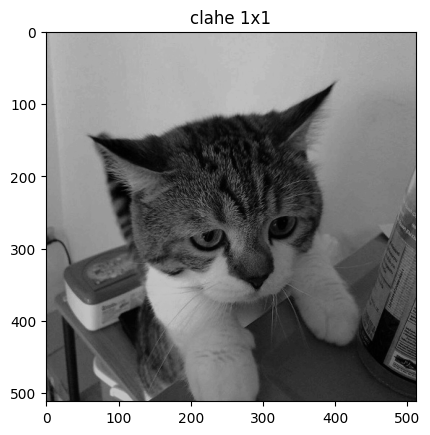

In [ ]:


GAIN = 2

# Generate low contrast image
img = cv2.imread("kitty.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.divide(img,GAIN)

# Write your code to visualize the results
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.title("low contrast")
plt.show()

# Use Histogram Equalization
equ = cv2.equalizeHist(img)
histeq = cv2.calcHist(equ, [0], None, [256], [0, 256])
plt.bar(range(0,256),histeq[:,0])
plt.title('hist of equ')
plt.xlim([0, 256])
plt.show()

plt.imshow(equ,cmap='gray',vmin=0,vmax=255)
plt.title("equalized")
plt.show()



# Use CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
plt.imshow(cl1,cmap='gray',vmin=0,vmax=255)
plt.title("clahe 8x8")
plt.show()


# TO DO : Use CLAHE - change cliplimit to 2.0 and grid size to 1x1
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(1,1))
cl1 = clahe.apply(img)
plt.imshow(cl1,cmap='gray',vmin=0,vmax=255)
plt.title("clahe 1x1")
plt.show()






## Exercise #2 Spatial Filtering
*  Filter2D

In [ ]:
small_im = np.random.random((5,5))*100
small_im = small_im.astype(np.uint8)

print(small_im)

kernel = np.ones((3,3),np.float32)/9
print(kernel)

dst_im = cv2.filter2D(small_im,-1,kernel)
print(dst_im)

[[76 33 10 37 90]
 [19 71  1 26  4]
 [89 47  8 41  0]
 [98 48 61 49 68]
 [53 75 63 93 26]]
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[52 33 31 22 31]
 [54 39 30 24 34]
 [60 49 39 29 34]
 [64 60 54 45 51]
 [66 67 61 60 60]]


* Averaging

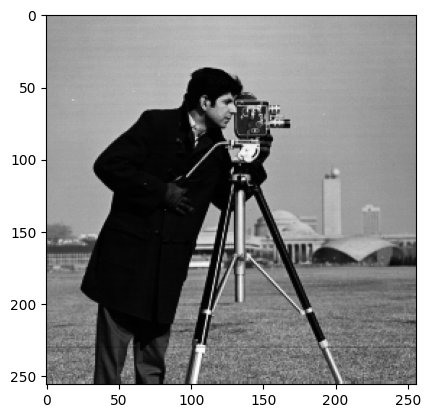

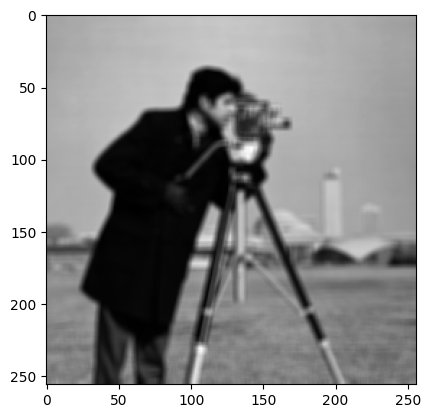

In [ ]:
img = cv2.imread("camaraman.tif",0)

kernel = np.ones((5,5),np.float32)/(5*5)
dst_im = cv2.filter2D(img,-1,kernel)

plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(dst_im,cmap='gray')
plt.show()

* Laplacian Filtering

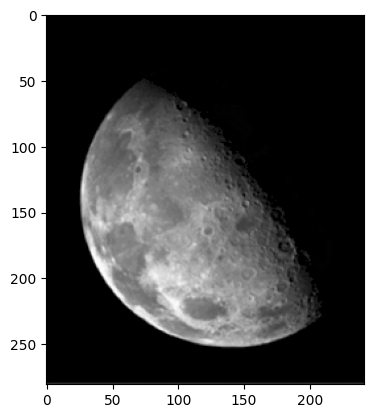

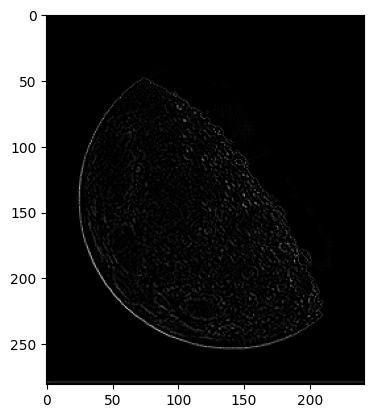

In [ ]:
img_gray = cv2.imread("moon.png",0)

lap_filter = np.array([[0,1,0],[1,-4,1],[0,1,0]],np.int16)
dst_im = cv2.filter2D(img_gray,-1,lap_filter)

plt.imshow(img_gray,cmap='gray')
plt.show()
plt.imshow(dst_im,cmap='gray')
plt.show()

## Exercise #3 Enhancing the image
* Enhancing the moon using laplacian filter

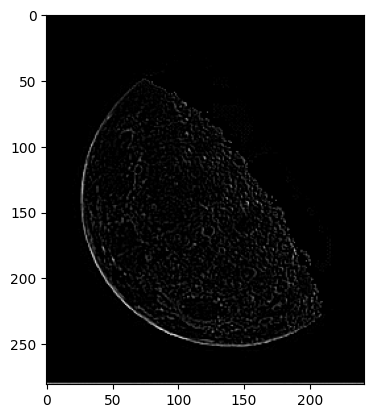

In [ ]:
shap = cv2.subtract(img_gray,dst_im)
plt.imshow(shap,cmap='gray')
plt.show()

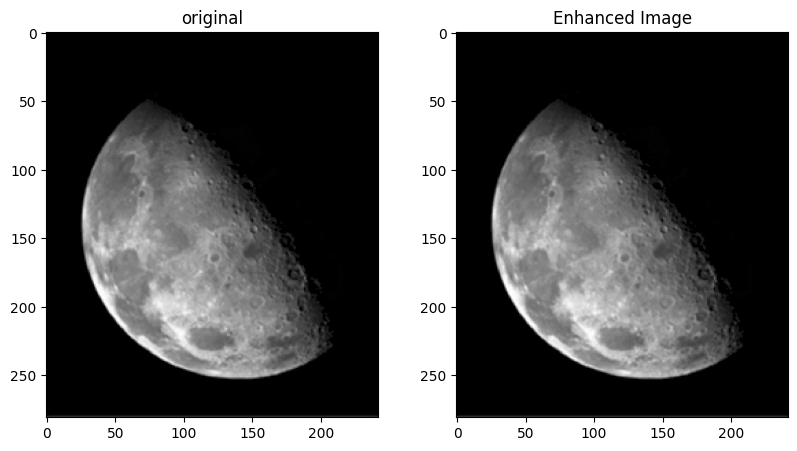

In [ ]:
img_gray = cv2.imread("moon.png",0)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray,cmap='gray')
plt.title("original")


kernel = np.ones((3,3),np.float32)/1000
dst = cv2.filter2D(img_gray,-1,kernel)

enhanced_img = cv2.add(img_gray, dst)
plt.subplot(1, 3, 2)
plt.imshow(enhanced_img, cmap='gray')
plt.title("Enhanced Image")



plt.show()


